**Процедура стандартизации данных**

In [74]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Определение

Пусть имеется множество измерений определенного признака $x_i, i=\overline{1,n}$. Тогда стандартизацией такого ряда называется преобразование по формуле:

$$\tilde{x}_{i} = \frac{x_{i} - \bar{x}}{\sigma}. \tag{1}$$

Где:
- $\bar{x}$ - среднее арифметческое рассматртваемого ряда;
- $\sigma$ - стандартное отклонение.

Получется, что выражение $(1)$ может быть переписано следующим образом:

$$\tilde{x}_{i} = \frac{x_{i} - \bar{x}}{\sqrt{\frac{1}{n} \sum_{i=1}^n(x_i - \bar{x})^2}}. \tag{2}$$

Иногда предпочитают не отнимать среднее арифметическое в числителе, тогда формула $(1)$ принимает вид:

$$\tilde{x}_i  = \frac{x_i}{\sigma}. \tag{3}$$

# Свойсва результата

Величина получаемая в результате применения формулы $(1)$ получает следующие свойсва:

1. **Среднее артиaметисеское результата равняется нулю:**

$$\frac{\sum_{i=1}^n\tilde{x_i}}{n} = \frac{1}{n}\sum_{i=1}^n \frac{x_i - \bar{x}}{\sigma} = \frac{1}{n\sigma}\left[\sum_{i=1}^n x_i - \sum_{i=1}^n\bar{x}\right] = \frac{1}{n\sigma}\left[\sum_{i=1}^n x_i - n\bar{x} \right] =
\frac{1}{n\sigma}\left[ \sum_{i=1}^n x_i - n \sum_{i=1}^n\frac{x_i}{n} \right] = 0.$$

2. **Стандаратное отклонение равняется единице:**

Запишем стандартное отлонение $\tilde{x}_i$:

$$\sum_{i=1}^n \frac{\tilde{x}_i - \bar{\tilde{x}}_i}{n}$$

Но читвая результаты пункта 1 ($\bar{\tilde{x}}_i = 0$), получаем:


$$\sum_{i=1}^n \frac{\tilde{x}_i}{n} = 
\frac{1}{n}\sum_{i=1}^n\left[ \frac{x_i-\bar{x}}{\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}} \right]^2 = 
\frac{1}{n}\sum_{i=1}^n\left[ \frac{(x_i-\bar{x})^2}{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2} \right] = 
\frac{1}{n}\left[ \frac{\sum_{i=1}^n(x_i-\bar{x})^2}{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2} \right] = \frac{n}{n} = 1.$$

# Влияние на коээфициенты моделей

## Линейная регрессия

In [90]:
n = 200

x = np.random.normal(0 , 0.3 , n)
y = x*3 + np.random.rand(n)-0.5

In [94]:
# базовая модель
basic_model = LinearRegression(
    fit_intercept = False
).fit(x.reshape([n,1]), y)

basic_model.coef_

array([3.12088719])

In [97]:
# стандартизованная модель
x_stand = (x-np.mean(x))/np.std(x)

stand_model = LinearRegression(
    fit_intercept = False
).fit(x_stand.reshape([n,1]), y)

stand_model.coef_

array([0.8638951])

In [99]:
stand_model.coef_/np.std(x)

array([3.10623359])

array([3.12088719])

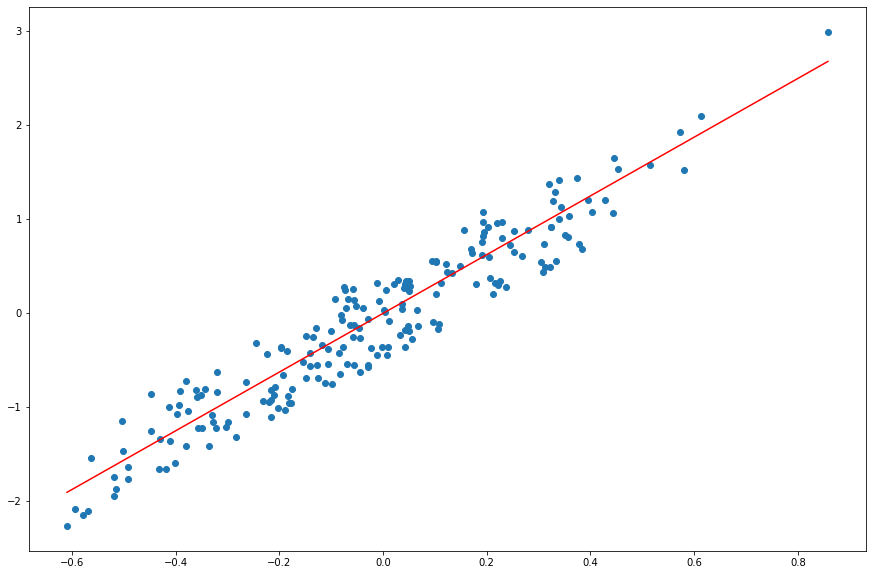

In [93]:
plot_x_range = np.linspace(np.min(x), np.max(x), 20)

plt.figure(figsize = [15,10])
plt.scatter(x,y)
plt.plot(
    plot_x_range,
    basic_model.predict(plot_x_range.reshape([20,1])),
    color = "red"
)

Рассмотрис взаимо

In [54]:
import numpy as np


np.random.seed(10)


n = 200
x1 = np.random.normal(0, 10, [n,1])
x2 = np.random.normal(0, 100, [n,1])

y = 2*x1 + 2*x2 + np.random.uniform(0,1,[n,1])
model = LinearRegression(
    fit_intercept = False
).fit(
    np.concatenate([x1,x2], axis = 1), y
)
model.coef_

array([[2.0046613 , 1.99999652]])

In [59]:
x1_stand = (x1 - np.mean(x1))/np.std(x1)
x2_stand = (x2 - np.mean(x2))/np.std(x2)

model = LinearRegression(
    fit_intercept = False
).fit(
    np.concatenate([x1_stand,x2_stand], axis = 1), y
)
model.coef_

array([[ 19.53528494, 184.9515684 ]])